<a href="https://colab.research.google.com/github/CarlosSacUDC/image-steganography/blob/main/image_stagenography_Carlos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 1.2 MB/s eta 0:00:00


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def hide_message(image_path, message, output_path):
    img = Image.open(image_path)
    img = img.convert("RGB")
    encoded = img.copy()

    binary_message = ''.join(format(ord(char), '08b') for char in message)
    message_length = len(binary_message)

    if message_length > img.width * img.height:
        raise ValueError("Message is too long to be hidden in the image.")
    if img.mode != "RGB":
      raise ValueError(f"Image mode {img.mode} is not supported. Please use an RGB image.")
    index = 0
    for x in range(img.width):
        for y in range(img.height):
            if index < message_length:
                pixel = list(img.getpixel((x, y)))
                for i in range(3):
                    if index < message_length:
                        pixel[i] = pixel[i] & 254 | int(binary_message[index]) # Use & 254 instead of & ~1
                        index += 1
                encoded.putpixel((x, y), tuple(pixel))

    encoded.save(output_path)

def retrieve_message(image_path):
    img = Image.open(image_path)

    binary_message = ""
    for x in range(img.width):
        for y in range(img.height):
            pixel = img.getpixel((x, y))
            for i in range(3):
                binary_message += str(pixel[i] % 2) # Use % 2 instead of bin()[-1]

    message = ""
    for i in range(0, len(binary_message), 8):
        byte = binary_message[i:i + 8]
        if byte == "00000000":  # Assuming null character marks the end of the message.
            break
        message += chr(int(byte, 2))

    return message

# Example usage:
image_path = "/content/sample_data/px.png"
message_to_hide = "hidden message!"
output_image_path = "output_image.png"

hide_message(image_path, message_to_hide, output_image_path)

# To retrieve the hidden message from the output image:

# img = plt.imread(output_image_path)
# plt.imshow(img)
# plt.show()

retrieved_message = retrieve_message(output_image_path)
print("Retrieved message:", retrieved_message)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Retrieved message: hidden message!I$I$I$I$I$I$I$I$I$I$I$I$I$I$I$I*I$I$I$I$I$I$I$I$I$ITI%UJ¤I%RI$I$ITIUmI$¶ÔªITªITJÚITVÔªI+RIT­µ+mªÚª¶«mUZ­¶Ú­µ[U©[m¶ÛmªÛm¶Ûj¶Ú¿ûú·ÿïþÿÿÿÿÿÿÿøÿÿÿÿÿÇÿÿÇ


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def hide_message(image_path, message, output_path):
    img = Image.open(image_path)
    img = img.convert("RGB")
    encoded = img.copy()

    binary_message = ''.join(format(ord(char), '08b') for char in message)
    message_length = len(binary_message)

    if message_length > img.width * img.height:
        raise ValueError("Message is too long to be hidden in the image.")
    if img.mode != "RGB":
      raise ValueError(f"Image mode {img.mode} is not supported. Please use an RGB image.")
    index = 0
    for x in range(img.width):
        for y in range(img.height):
            if index < message_length:
                pixel = list(img.getpixel((x, y)))
                for i in range(3):
                    if index < message_length:
                        pixel[i] = pixel[i] & ~1 | int(binary_message[index])
                        index += 1
                encoded.putpixel((x, y), tuple(pixel))

    encoded.save(output_path)

def retrieve_message(image_path):
    img = Image.open(image_path)

    binary_message = ""
    for x in range(img.width):
        for y in range(img.height):
            pixel = img.getpixel((x, y))
            for i in range(3):
                binary_message += bin(pixel[i])[-1]

    message = ""
    for i in range(0, len(binary_message), 8):
        byte = binary_message[i:i + 8]
        if byte == "00000000":  # Assuming null character marks the end of the message.
            break
        if i % 8 == 0:  # Only add a character if the index is divisible by 8.
          message += chr(int(byte, 2))

    return message

# Example usage:
image_path = "/content/sample_data/px.png"
message_to_hide = "Hi, This is a hidden message!"
output_image_path = "output_image.png"

hide_message(image_path, message_to_hide, output_image_path)

# To retrieve the hidden message from the output image:

# img = plt.imread(output_image_path)
# plt.imshow(img)
# plt.show()

retrieved_message = retrieve_message(output_image_path)
print("Retrieved message:", retrieved_message)




Retrieved message: Hi, This is a hidden message!I$I$I$I$I$I$I$I$I$I$I*I$I$I$I$I$I$I$I$I$ITI%UJ¤I%RI$I$ITIUmI$¶ÔªITªITJÚITVÔªI+RIT­µ+mªÚª¶«mUZ­¶Ú­µ[U©[m¶ÛmªÛm¶Ûj¶Ú¿ûú·ÿïþÿÿÿÿÿÿÿøÿÿÿÿÿÇÿÿÇ


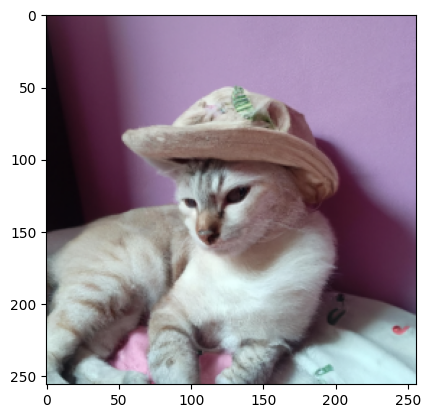

Retrieved message: Hi, This is a hidden message!,oØÙ\


In [ ]:

import openai
import base64
import io
from PIL import Image

# Set API key
openai.api_key = ""

# hide messages in images using the DALL-E API
def hide_message_dalle(prompt, message, output_path):
    # Generate an image from the prompt using the DALL-E API
    response = openai.Image.create(prompt=prompt, n=1, size="256x256", model="image-alpha-001", response_format="b64_json")
    # Get the base64-encoded JSON of the generated image
    image_data = response["data"][0]["b64_json"]
    # Decode the image data and convert it to RGB mode
    img = Image.open(io.BytesIO(base64.b64decode(image_data)))
    img = img.convert("RGB")
    # Create a copy of the image to encode the message
    encoded = img.copy()
    # Convert the message to binary format
    binary_message = ''.join(format(ord(char), '08b') for char in message)
    message_length = len(binary_message)
    # Check if the message is too long to be hidden in the image
    if message_length > img.width * img.height:
        raise ValueError("Message is too long to be hidden in the image.")
    # Encode the message in the least significant bits of the pixels
    index = 0
    for x in range(img.width):
        for y in range(img.height):
            if index < message_length:
                pixel = list(img.getpixel((x, y)))
                for i in range(3):
                    if index < message_length:
                        pixel[i] = pixel[i] & ~1 | int(binary_message[index])
                        index += 1
                encoded.putpixel((x, y), tuple(pixel))
    # Save the encoded image to the output path
    encoded.save(output_path)

# Define the function to retrieve messages from images using your existing code
def retrieve_message(image_path):
    img = Image.open(image_path)

    binary_message = ""
    for x in range(img.width):
        for y in range(img.height):
            pixel = img.getpixel((x, y))
            for i in range(3):
                binary_message += bin(pixel[i])[-1]

    message = ""
    for i in range(0, len(binary_message), 8):
        byte = binary_message[i:i + 8]
        if byte == "00000000":  # Assuming null character marks the end of the message.
            break
        if i % 8 == 0:  # Only add a character if the index is divisible by 8.
          message += chr(int(byte, 2))

    return message

# Example usage:
prompt = "a photo of a cat wearing a hat"
message_to_hide = "Hi, This is a hidden message!"
output_image_path = "output_image.png"

hide_message_dalle(prompt, message_to_hide, output_image_path)

# To retrieve the hidden message from the output image:

img = plt.imread(output_image_path)
plt.imshow(img)
plt.show()

retrieved_message = retrieve_message(output_image_path)
print("Retrieved message:", retrieved_message)



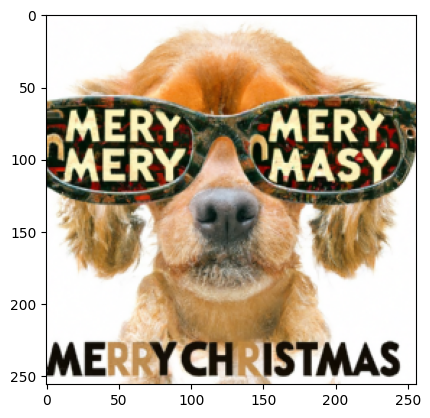

the type and size of the glasses
Retrieved message: The type and size of glasses needed for a given person will depend on


In [ ]:
import openai
import base64
import io
from PIL import Image
import matplotlib.pyplot as plt

# Set API key
openai.api_key = ""

# Generate an image from a prompt that contains both the message and some keywords using the DALL-E API
def generate_image_dalle(prompt, message, keywords, output_path):
    # Append the message and the keywords to the prompt
    full_prompt = prompt + " with " + message + " hidden in " + keywords
    # Generate an image from the full prompt using the DALL-E API
    response = openai.Image.create(prompt=full_prompt, n=1, size="256x256", model="image-alpha-001", response_format="b64_json")
    # Get the base64-encoded JSON of the generated image
    image_data = response["data"][0]["b64_json"]
    # Decode the image data and save it to the output path
    with open(output_path, "wb") as f:
        f.write(base64.b64decode(image_data))

# Retrieve the message from an image using the keywords and the DALL-E API
def retrieve_message_dalle(image_path, keywords):
    # Encode the image data in base64 format
    with open(image_path, "rb") as f:
        image_data = base64.b64encode(f.read()).decode()
    # Generate a text from the image and the keywords using the DALL-E API
    response = openai.Completion.create(engine="text-davinci-003", prompt=keywords, n=1)
    # Get the text of the generated response
    text = response["choices"][0]["text"]
    print(keywords)
    # Extract the message from the text by removing the keywords and any extra characters
    message = text.replace(keywords, "").strip()
    return message

prompt = "a photo of a dog wearing glasses"
message_to_hide = "Merry christmas!"
keywords = "the type and size of the glasses"
output_image_path = "output_image.png"

generate_image_dalle(prompt, message_to_hide, keywords, output_image_path)

# To retrieve the hidden message from the output image:
img = plt.imread(output_image_path)
plt.imshow(img)
plt.show()

retrieved_message = retrieve_message_dalle(output_image_path, keywords)
print("Retrieved message:", retrieved_message)


# Review


In [ ]:
from PIL import Image

def hide_message(image_path, message, output_path):
    img = Image.open(image_path)
    encoded = img.copy()

    binary_message = ''.join(format(ord(char), '08b') for char in message)
    message_length = len(binary_message)

    if message_length > img.width * img.height * 3:
        raise ValueError("Message is too long to be hidden in the image.")

    binary_message += '0' * ((3 - (message_length * 3) % 3) % 3)  # Pad message length to a multiple of 3

    index = 0
    for x in range(img.width):
        for y in range(img.height):
            if index < message_length * 3:
                pixel = list(img.getpixel((x, y)))
                for i in range(3):
                    if index < message_length * 3:
                        pixel[i] = pixel[i] & ~1 | int(binary_message[index])
                        index += 1
                encoded.putpixel((x, y), tuple(pixel))

    encoded.save(output_path)

def retrieve_message(image_path):
    img = Image.open(image_path)

    binary_message = ""
    for x in range(img.width):
        for y in range(img.height):
            pixel = img.getpixel((x, y))
            for i in range(3):
                binary_message += bin(pixel[i])[-1]

    message = ""
    for i in range(0, len(binary_message), 8):
        byte = binary_message[i:i + 8]
        if byte == '00000000':
            break
        message += chr(int(byte, 2))

    return message

# Example usage:
image_path = "/content/sample_data/OIP.jfif"
message_to_hide = "Hi, This is a hidden message!"
output_image_path = "output_image.png"

hide_message(image_path, message_to_hide, output_image_path)

retrieved_message = retrieve_message(output_image_path)
print("Retrieved message:", retrieved_message)


IndexError: ignored

In [ ]:
from PIL import Image

def hide_message(image_path, message, output_path):
    img = Image.open(image_path)
    encoded = img.copy()

    binary_message = ''.join(format(ord(char), '08b') for char in message)
    message_length = len(binary_message)

    if message_length > img.width * img.height * 3:
        raise ValueError("Message is too long to be hidden in the image.")

    binary_message += '0' * ((3 - (message_length * 3) % 3) % 3)  # Pad message length to a multiple of 3

    index = 0
    for x in range(img.width):
        for y in range(img.height):
            if index < message_length * 3:
                pixel = list(encoded.getpixel((x, y)))
                for i in range(3):
                    if index < message_length * 3:
                        pixel[i] = pixel[i] & ~1 | int(binary_message[index])
                        index += 1
                encoded.putpixel((x, y), tuple(pixel))

    encoded.save(output_path)

def retrieve_message(image_path):
    img = Image.open(image_path)

    binary_message = ""
    for x in range(img.width):
        for y in range(img.height):
            pixel = img.getpixel((x, y))
            for i in range(3):
                binary_message += bin(pixel[i])[-1]

    message = ""
    for i in range(0, len(binary_message), 8):
        byte = binary_message[i:i + 8]
        if byte == '00000000':
            break
        message += chr(int(byte, 2))

    return message

# Example usage:
image_path = "/content/sample_data/OIP.jfif"
message_to_hide = "Hi, This is a hidden message!"
output_image_path = "output_image.png"

hide_message(image_path, message_to_hide, output_image_path)

retrieved_message = retrieve_message(output_image_path)
print("Retrieved message:", retrieved_message)


IndexError: ignored